In [1]:
import torch
import torchvision.models as models

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_vgg = models.vgg16(pretrained=True)

In [4]:
model_vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
from torchinfo import summary

In [7]:
summary(model_vgg, (1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [8]:
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torchvision.transforms as T
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io, transform
import random
import scipy
%matplotlib inline

In [9]:
### Loading data directly from the Hub library ###

"""
import hub
ds = hub.load("hub://activeloop/imagenet-test")
"""

'\nimport hub\nds = hub.load("hub://activeloop/imagenet-test")\n'

In [10]:
val_data_dir = r"C:\Users\ameyv\BTP\imagenette2\val"
transform = transforms.Compose([transforms.CenterCrop(224), transforms.ToTensor()])
val_data = datasets.ImageFolder(val_data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(val_data, batch_size=100, shuffle=True)

In [11]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [15]:
images, labels = next(iter(dataloader))
print(labels)
print(len(images))

tensor([1, 7, 6, 5, 1, 6, 7, 1, 4, 9, 0, 3, 9, 8, 8, 2, 3, 5, 9, 6, 7, 1, 1, 9,
        6, 1, 6, 0, 9, 8, 3, 5, 1, 4, 1, 1, 3, 1, 1, 7, 1, 6, 0, 8, 0, 0, 8, 0,
        1, 3, 9, 7, 3, 9, 1, 2, 9, 1, 7, 4, 7, 1, 5, 6, 5, 2, 0, 4, 0, 1, 5, 8,
        5, 9, 3, 0, 0, 3, 3, 4, 5, 2, 4, 4, 9, 4, 7, 9, 6, 3, 5, 3, 1, 7, 1, 7,
        3, 0, 2, 0])
100


tensor(6)
tensor(8)
tensor(4)
tensor(8)
tensor(0)
tensor(3)
tensor(5)
tensor(2)
tensor(2)
tensor(2)


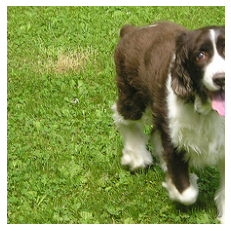

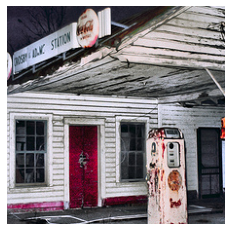

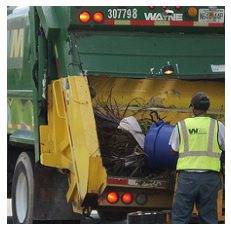

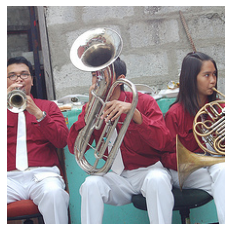

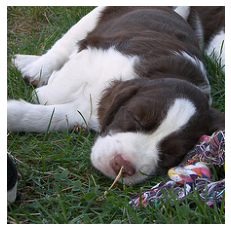

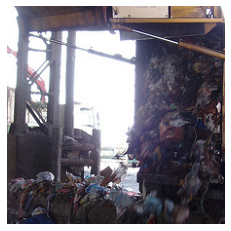

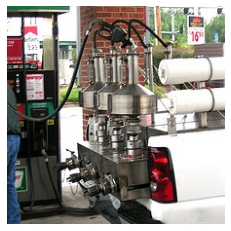

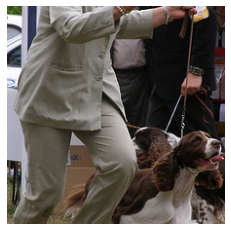

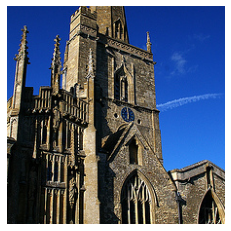

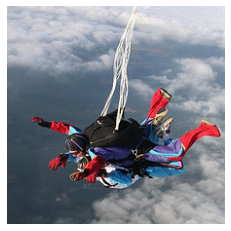

In [20]:
for i in range(10):
    imshow(images[i], normalize=False)
    print(labels[i])

In [16]:
model_vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [22]:
test_accuracy = 0.0
for sample, label in dataloader:
    with torch.no_grad():
        output = model_vgg(sample)
        prediction = torch.argmax(output, dim=1)
        correct = prediction.eq(label)
        test_accuracy += torch.mean(correct.float())
print('Accuracy of the network on {} test images: {}%'.format(len(val_data), round(test_accuracy.item()*100.0/len(dataloader), 2)))


Accuracy of the network on 3925 test images: 4.0%


In [21]:
### The results are incorrect
    # We have not used proper labelling either for images or for the model
    # The model is trrained for 1000 class ImageNet, however our data is a 10-calss subset of this data 
###